In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
with open("npidb.list") as f_tr:
    names = f_tr.read().splitlines()
a=[]
for name in names:
    b=name.split("_")[0]+'_'+name.split('_')[1]
    x=np.load('npi_dataset/raw/'+b+'_atomtypes.npy')
    a.append(x.shape[0])
a=np.array(a)
names=np.array(names)



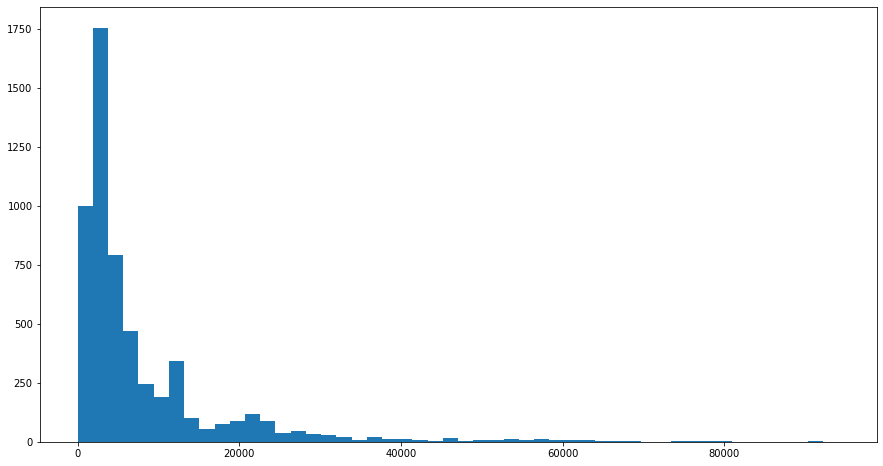

In [3]:
fig=plt.figure(figsize=(15,8))
plt.hist(a, bins=50)
plt.show()

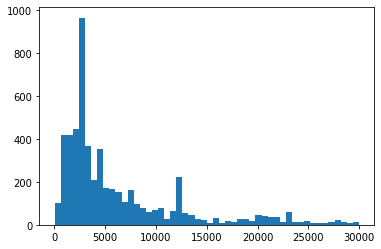

In [6]:
b=a[a<=30000]
plt.hist(b, bins=50)
plt.show()

In [7]:
len(b)

5424

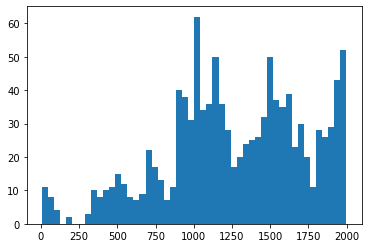

In [8]:
plt.hist(a[a<2000], bins=50)
plt.show()

In [9]:
b=a[a>250]
b=b[b<30000]
len(b)

5399

In [10]:
names=names[(a>250) & (a<30000)]

In [11]:
with open("masif_npi/npidb.list", 'w') as f_tr:
    f_tr.write('\n'.join(list(names)))
    f_tr.write('\n')

In [12]:
with open("masif_npi/npidb.list") as f_tr:
    names = f_tr.read().splitlines()
a=[]
for name in names:
    b=name.split("_")[0]+'_'+name.split('_')[1]
    x=np.load('masif_npi/npys/'+b+'_atomtypes.npy')
    a.append(x.shape[0])
a=np.array(a)
names=np.array(names)

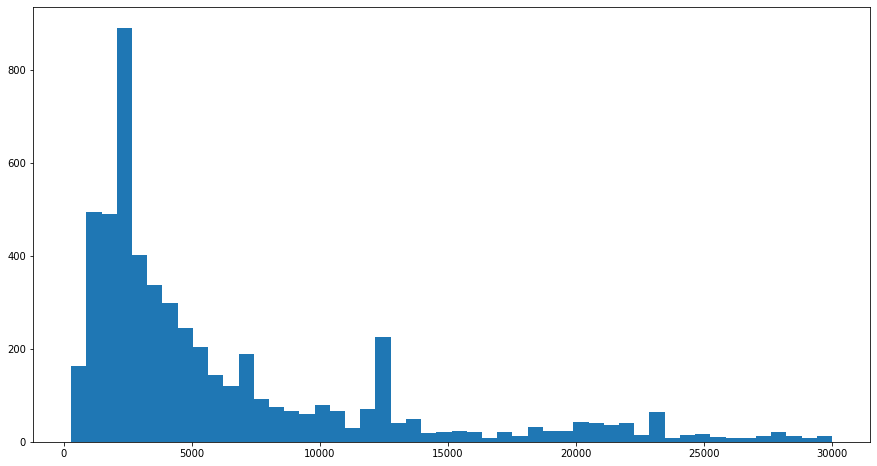

In [13]:
fig=plt.figure(figsize=(15,8))
plt.hist(a, bins=50)
plt.show()

In [34]:
import torch
dataset=torch.load('npi_dataset/processed/npi/training_npi.pt')

In [65]:
a=np.array(dataset[0].gen_labels_p1)
length=a.shape[0]

/home/domain/data/prog/miniconda3/envs/dmasif/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


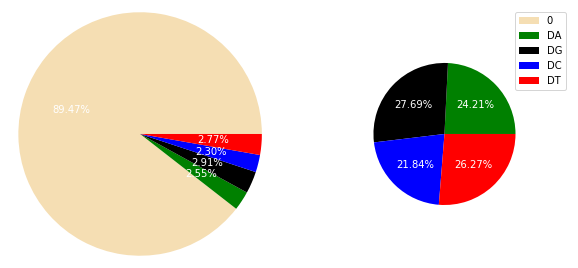

In [80]:
fig,ax=plt.subplots(1,2, figsize=(10,10))
ax[0].pie(np.sum(a[:,None]==np.array([0,1,2,3,4])[None,:],axis=0), 
          colors=['wheat','green','black','blue','red'],
          autopct=lambda x: f'{x:.2f}%',
          labels=['0','DA','DG','DC','DT'], radius=1.2, 
          textprops={'fontsize':10, 'color': 'white'})
ax[1].pie(np.sum(a[:,None]==np.array([5,1,2,3,4])[None,:],axis=0), 
          colors=['wheat','green','black','blue','red'],
          autopct=lambda x: f'{x:.2f}%'if x>0 else '',
          labels=['0','DA','DG','DC','DT'], radius=0.7, 
          textprops={'fontsize':10, 'color': 'white'})
ax[1].legend()
fig.show()